In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))


(1797, 64)


In [4]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [7]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data type of an item: ", type(digits.images[0]))


Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data type of an item:  <class 'numpy.ndarray'>


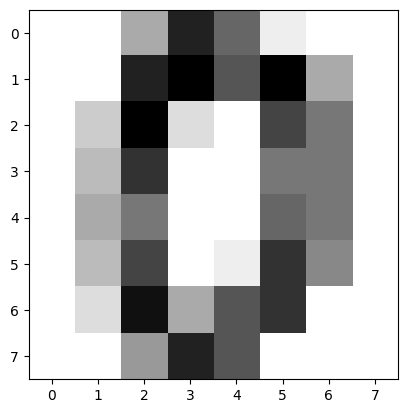

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap='binary')
plt.show()

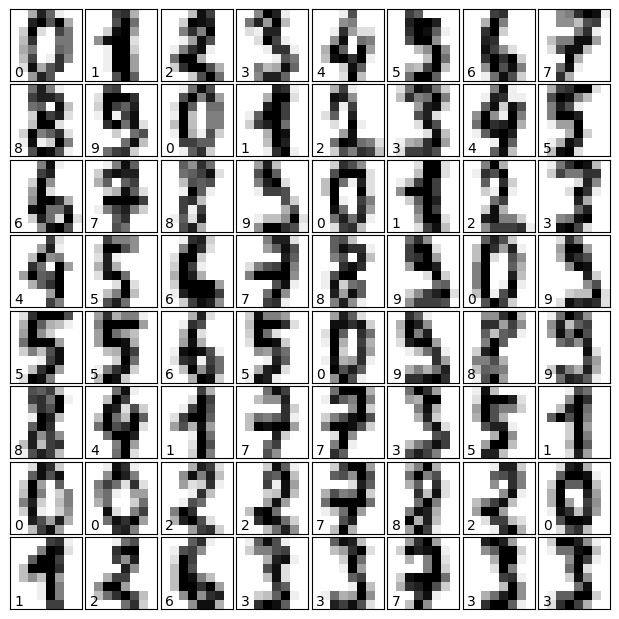

In [9]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
# label the image with the target value
  ax.text(0, 7, str(digits.target[i]))


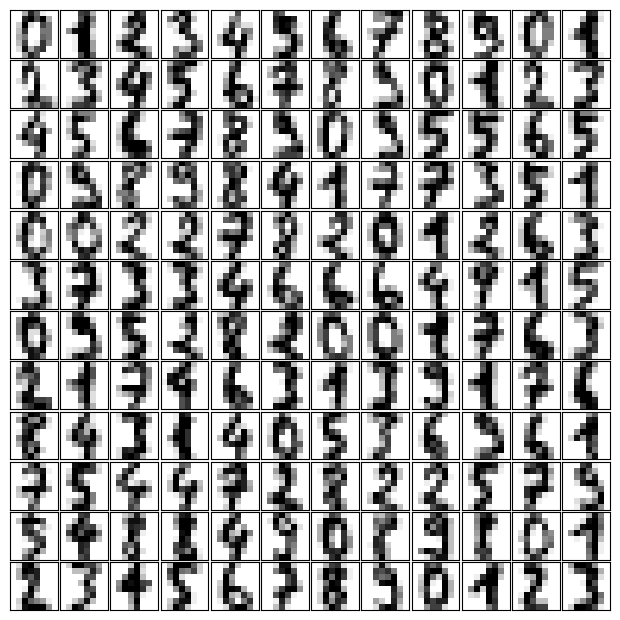

In [10]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(144):
  ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [11]:
from sklearn.model_selection import train_test_split
res = train_test_split(digits.data, digits.target,
train_size=0.8,
test_size=0.2,
random_state=1)
train_data, test_data, train_labels, test_labels = res


In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,),
activation='logistic',
alpha=1e-4,
solver='sgd',
tol=1e-4,
random_state=1,
learning_rate_init=.3,
verbose=True)

In [13]:
mlp.fit(train_data, train_labels)


Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95476869
Iteration 8, loss = 0.98840135
Iteration 9, loss = 0.85124323
Iteration 10, loss = 0.75499271
Iteration 11, loss = 0.80608405
Iteration 12, loss = 0.72358116
Iteration 13, loss = 0.68370817
Iteration 14, loss = 0.78455371
Iteration 15, loss = 0.71477343
Iteration 16, loss = 0.66806356
Iteration 17, loss = 0.81050074
Iteration 18, loss = 0.68337671
Iteration 19, loss = 0.74931776
Iteration 20, loss = 0.66185255
Iteration 21, loss = 0.77614665
Iteration 22, loss = 0.69448062
Iteration 23, loss = 0.70176765
Iteration 24, loss = 0.76440970
Iteration 25, loss = 0.70033401
Iteration 26, loss = 0.65138383
Iteration 27, loss = 0.59872788
Iteration 28, loss = 0.57207818
Iteration 29, loss = 0.62176226
Iteration 30, loss = 0.58669984
Iteration 31, loss = 0.54031128
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

In [14]:
predictions = mlp.predict(test_data)
predictions[:25] , test_labels[:25]


(array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 1, 8, 4, 1, 7, 3, 7, 1, 1, 1,
        8, 6, 0]),
 array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
        8, 6, 0]))

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.8194444444444444

In [16]:
for i in range(5, 30):
  mlp = MLPClassifier(hidden_layer_sizes=(i,),activation='logistic',random_state=1,alpha=1e-4,solver='sgd',tol=1e-4,learning_rate_init=.3,verbose=False)
  mlp.fit(train_data, train_labels)
  predictions = mlp.predict(test_data)
  acc_score = accuracy_score(test_labels, predictions)
  print(i, acc_score)


5 0.8194444444444444
6 0.8777777777777778
7 0.8777777777777778
8 0.8444444444444444
9 0.8722222222222222
10 0.9083333333333333
11 0.9194444444444444
12 0.9416666666666667
13 0.9611111111111111
14 0.9666666666666667
15 0.9305555555555556
16 0.9611111111111111
17 0.8111111111111111
18 0.9527777777777777
19 0.9361111111111111
20 0.9694444444444444
21 0.9638888888888889
22 0.9388888888888889
23 0.9555555555555556
24 0.9694444444444444
25 0.9611111111111111
26 0.975
27 0.9694444444444444
28 0.9555555555555556
29 0.9611111111111111


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{
'activation' : ['identity', 'logistic', 'tanh', 'relu'],
'solver' : ['lbfgs', 'sgd', 'adam'],
'hidden_layer_sizes': [
(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
]
}
]

In [18]:
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
scoring='accuracy')
clf.fit(train_data, train_labels)
print("Best parameters set found on development set:")
print(clf.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
